<a href="https://colab.research.google.com/github/Pageblan/Decision-Trees/blob/main/Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

About this file

Add Suggestion
Student ID
StudentID: A unique identifier assigned to each student (1001 to 3392).
Demographic Details
Age: The age of the students ranges from 15 to 18 years.
Gender: Gender of the students, where 0 represents Male and 1 represents Female.
Ethnicity: The ethnicity of the students, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other
ParentalEducation: The education level of the parents, coded as follows:
0: None
1: High School
2: Some College
3: Bachelor's
4: Higher
Study Habits
StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
Absences: Number of absences during the school year, ranging from 0 to 30.
Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.
Parental Involvement
ParentalSupport: The level of parental support, coded as follows:
0: None
1: Low
2: Moderate
3: High
4: Very High
Extracurricular Activities
Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.
Academic Performance
GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
Target Variable: Grade Class
GradeClass: Classification of students' grades based on GPA:
0: 'A' (GPA >= 3.5)
1: 'B' (3.0 <= GPA < 3.5)
2: 'C' (2.5 <= GPA < 3.0)
3: 'D' (2.0 <= GPA < 2.5)
4: 'F' (GPA < 2.0)

In [50]:
from google.colab import drive

In [51]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv("/content/drive/MyDrive/Student_performance_data__[1].csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [9]:
df = df.drop(['StudentID'],axis=1)
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [52]:
df_copy = df.copy()

In [11]:
target_name = df_copy.columns[-1]

features_name = df_copy.columns[:-1]

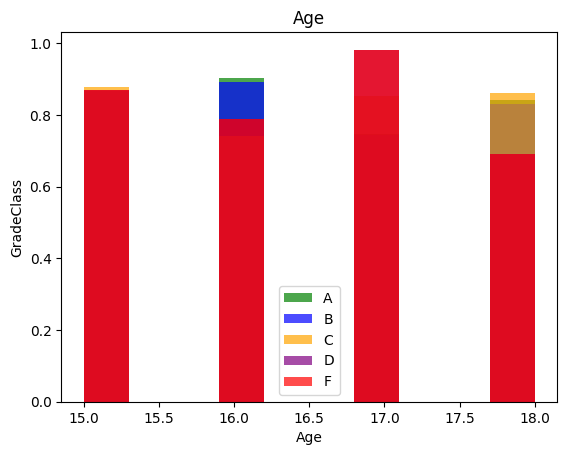

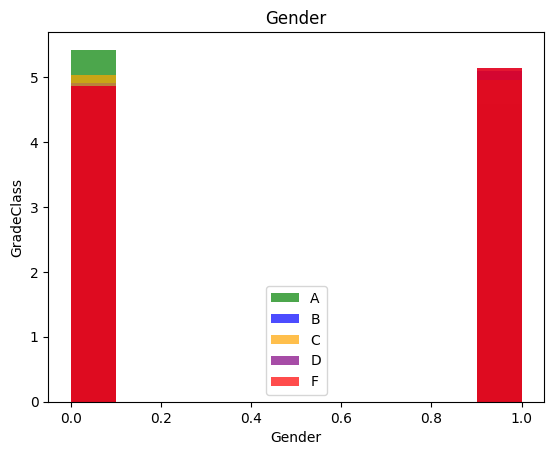

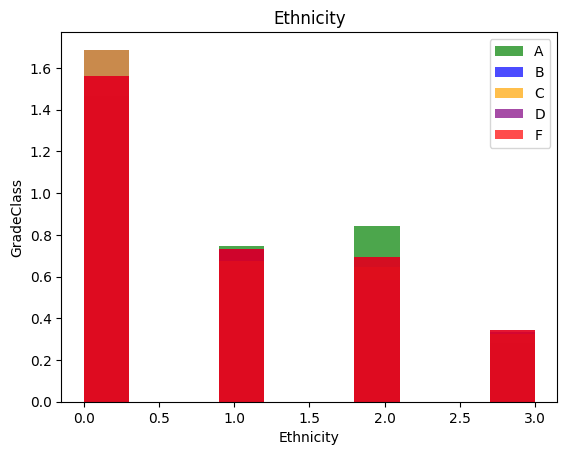

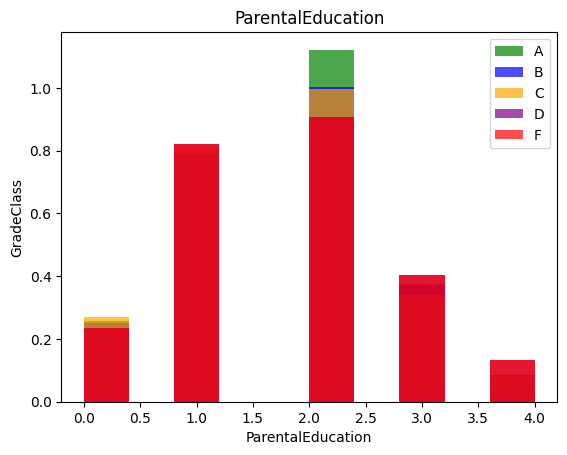

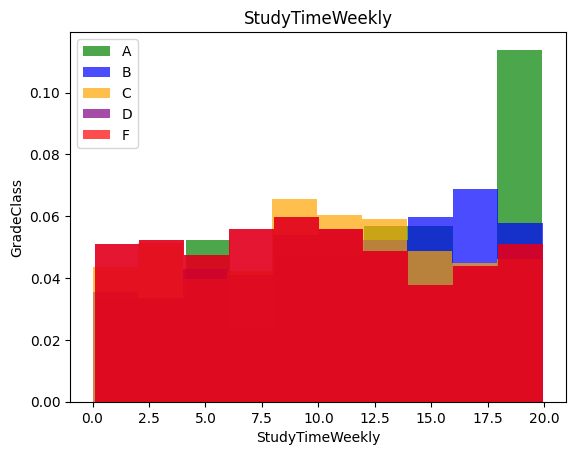

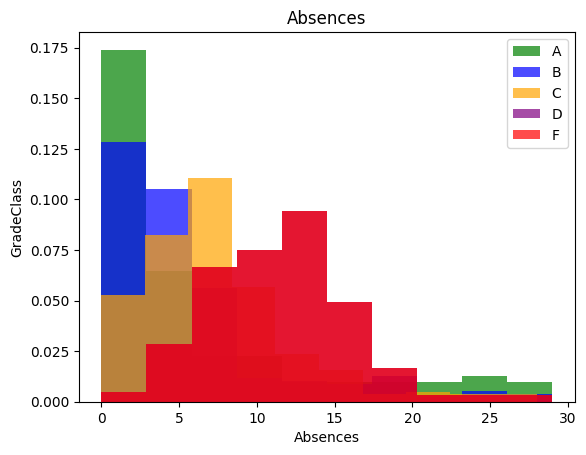

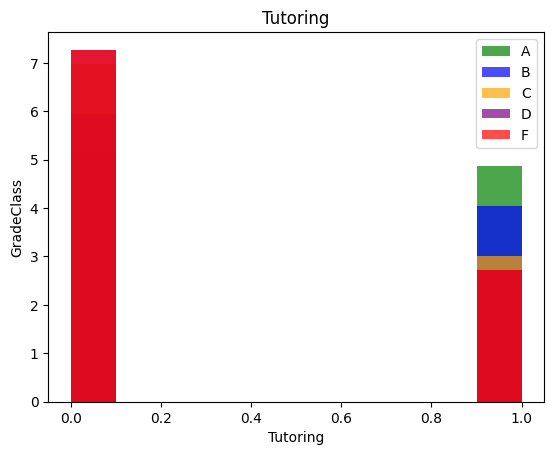

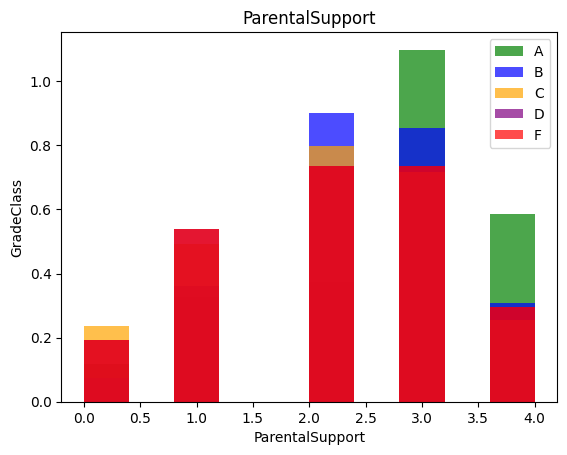

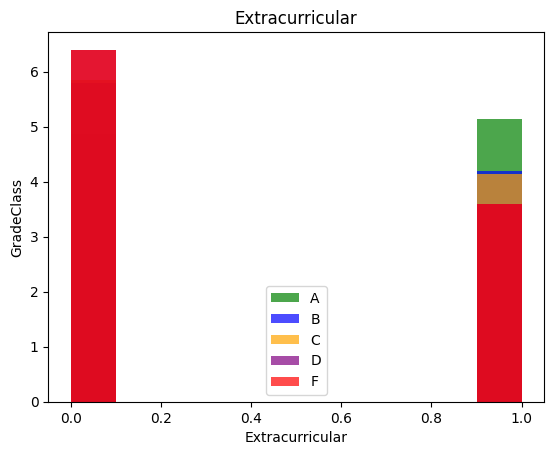

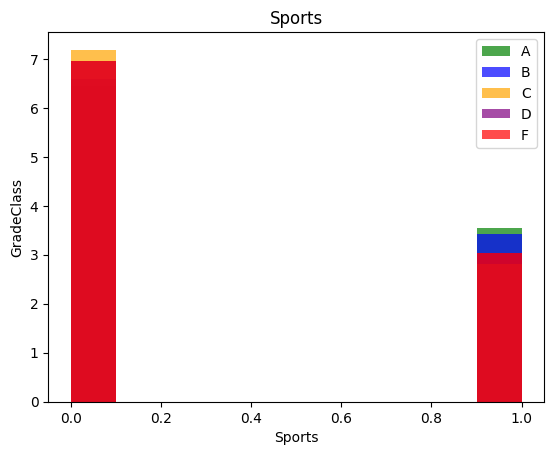

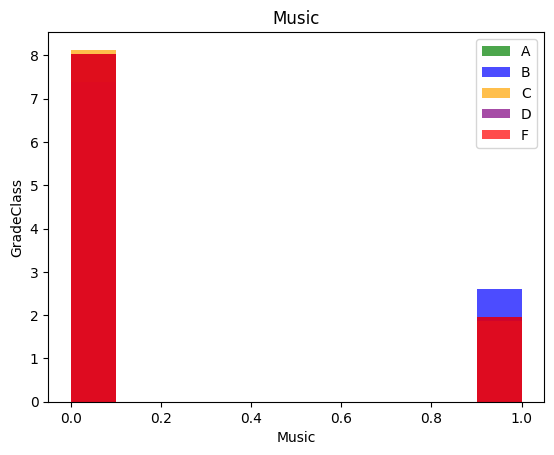

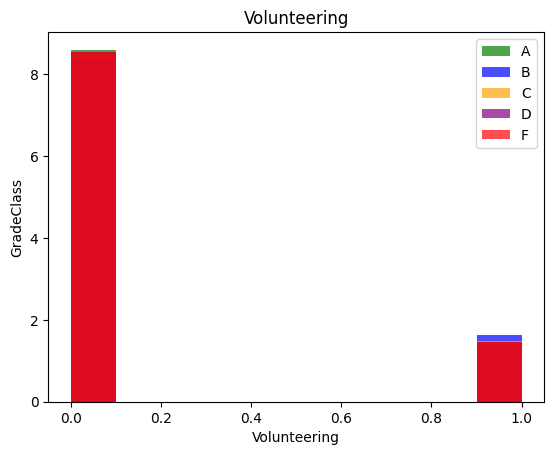

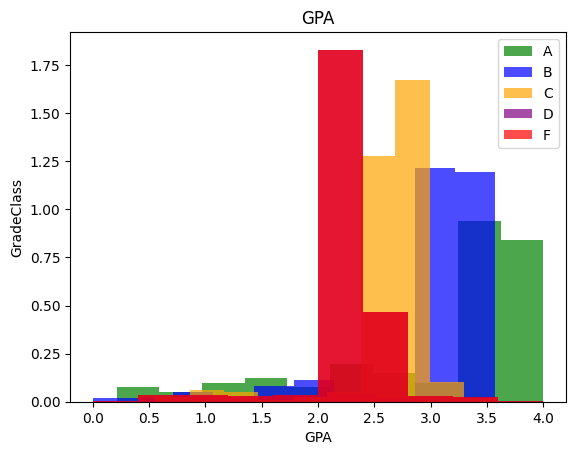

In [12]:
for label in df_copy.columns[:-1]:
  plt.hist(df_copy[df_copy["GradeClass"]==0][label], color='green', label='A', alpha=0.7, density=True)
  plt.hist(df_copy[df_copy["GradeClass"]==1][label], color='blue', label='B', alpha=0.7, density=True)
  plt.hist(df_copy[df_copy["GradeClass"]==2][label], color='orange', label='C', alpha=0.7, density=True)
  plt.hist(df_copy[df_copy["GradeClass"]==3][label], color='purple', label='D', alpha=0.7, density=True)
  plt.hist(df_copy[df_copy["GradeClass"]==3][label], color='red', label='F', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel(target_name)
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [112]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df_copy))])

In [113]:
def scale_dataset(dataframe, oversample=False):
  # Extract features and target
  x = dataframe[dataframe.columns [:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  # Initialize the StandardScaler
  scaler = StandardScaler()

  # Fit and transform the features
  x = scaler.fit_transform(x)

  # Apply oversampling if needed
  if oversample:
    ros = RandomOverSampler(random_state=42)
    x, y = ros.fit_resample(x, y)

  # Combine the scaled features and target into one dataset
  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [114]:
train, x_train, y_train = scale_dataset(train, oversample=True)#x and x_train are the same
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test,  x_test,  y_test  = scale_dataset(test,  oversample=False)

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Knn Neighbors

In [116]:
knn_model = KNeighborsClassifier(n_neighbors=23, weights='distance', metric='manhattan')

scores = cross_val_score(knn_model, x_train, y_train, cv=10, scoring='accuracy')

print("Cross-validation accuracy:", scores.mean())
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Cross-validation accuracy: 0.9416666666666668
Accuracy: 60.13%


Naive Bayes

In [117]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [118]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

mnb = MultinomialNB(alpha=1.0)
mnb.fit(x_train, y_train)

y_pred = mnb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 53.44%


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.07      0.87      0.13        23
         1.0       0.11      0.16      0.13        64
         2.0       0.40      0.03      0.05        72
         3.0       1.00      0.04      0.08        73
         4.0       0.91      0.35      0.51       247

    accuracy                           0.25       479
   macro avg       0.50      0.29      0.18       479
weighted avg       0.70      0.25      0.30       479



Sector Vector

In [119]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [164]:
sv_model = SVC(kernel='linear', C=23, random_state=42)
sv_model.fit(x_train, y_train)

#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
#svc = SVC()
#clf = GridSearchCV(svc, parameters)
#clf.fit(x_train, y_train)

y_pred = sv_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 76.41%


Decision Trees

In [165]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [166]:
x = df_copy[df_copy.columns [:-1]].values
y = df_copy[df_copy.columns[-1]].values

In [167]:
#split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [168]:
#fit the data into decision trees classifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [169]:
#Print the accuracy score
x_pred = classifier.predict(x_test,)
accuracy = accuracy_score(y_test, x_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 83.51%


Post-Pruning

In [170]:
# Train a full decision tree
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [171]:
# Get the cost complexity pruning path
path = classifier.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [172]:
# Train multiple trees with different values of ccp_alpha
classifiers = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    classifiers.append(clf)

In [173]:
# Evaluate the classifiers and select the best one based on validation performance
best_classifier = max(classifiers, key=lambda clf: clf.score(x_test, y_test))

# Print the best classifier's score
best_score = best_classifier.score(x_test, y_test)
print(f"Best classifier accuracy: {best_score * 100:.2f}%")

Best classifier accuracy: 92.28%


In [174]:
# Train the model with best parameters
best_classifier.fit(x_train, y_train)
y_pred = best_classifier.predict(x_test)

In [175]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 92.28%
              precision    recall  f1-score   support

         0.0       0.88      0.64      0.74        22
         1.0       0.88      0.88      0.88        49
         2.0       0.94      0.87      0.90        85
         3.0       0.90      0.90      0.90        86
         4.0       0.94      0.99      0.96       237

    accuracy                           0.92       479
   macro avg       0.90      0.85      0.88       479
weighted avg       0.92      0.92      0.92       479



Pre-Pruning

In [176]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_classifier2 = grid_search.best_estimator_

In [177]:
# Evaluate with cross-validation
scores = cross_val_score(best_classifier2, x, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean() * 100:.2f}%")
print("Best parameters found:")
print(grid_search.best_params_)

Cross-validation scores: [0.99791232 0.99373695 1.         0.9665272  0.68200837]
Mean cross-validation score: 92.80%
Best parameters found:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 20}


Random Forest

In [178]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier

In [179]:
# Define a more extensive parameter grid
param_dist = {
    'n_estimators': [200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with RandomForestClassifier
clf = RandomForestClassifier() # Initialize a RandomForestClassifier
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(x_train, y_train)

# Get the best model
best_clf = random_search.best_estimator_

# Make predictions with the best model
y_pred = best_clf.predict(x_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the best model: {accuracy:.2f}')
print("Classification report:")
print(classification_report(y_test, y_pred))

# Print the best parameters found by RandomizedSearchCV
print("Best parameters found:")
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy of the best model: 0.91
Classification report:
              precision    recall  f1-score   support

         0.0       0.80      0.36      0.50        22
         1.0       0.78      0.86      0.82        49
         2.0       0.93      0.87      0.90        85
         3.0       0.90      0.90      0.90        86
         4.0       0.94      0.99      0.96       237

    accuracy                           0.91       479
   macro avg       0.87      0.79      0.81       479
weighted avg       0.91      0.91      0.90       479

Best parameters found:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}


Logistic Regression

In [180]:
from sklearn.linear_model import LogisticRegression

In [236]:
# Create and train the model
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5845511482254697
Classification Report:
               precision    recall  f1-score   support

         0.0       0.10      0.32      0.15        22
         1.0       0.33      0.27      0.30        49
         2.0       0.46      0.36      0.41        85
         3.0       0.41      0.48      0.44        86
         4.0       0.93      0.79      0.85       237

    accuracy                           0.58       479
   macro avg       0.45      0.44      0.43       479
weighted avg       0.65      0.58      0.61       479

